In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np # for linear algebra
import pandas as pd # data processing, CSV file I/O, etc
import seaborn as sns # for plots
import plotly.graph_objects as go # for plots
import plotly.express as px #for plots
import matplotlib.pyplot as plt # for visualizations and plots

# **Content Dataset**

In [3]:
content = pd.read_csv('/kaggle/input/forage-accenture-virtual-intern/Content.csv')
content

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [6]:
#Getting info 
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [10]:
#Checking for NaN values
content.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [14]:
#removing rows that have values which are missing,
content.dropna(inplace=True)


content.isnull().sum()

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Category      0
URL           0
dtype: int64

In [16]:
#drop unnecessary columns 
content = content.drop(columns=['Unnamed: 0','URL'])
content.head(10)

,Content ID,User ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food
6,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,dogs
7,e5490118-90d5-4572-ab1c-1fbc87b8d9ca,583f2bde-886d-4cf3-a5c4-7cb60cd25df3,video,technology
8,0bedca96-fb76-4287-a83c-17330ed39cce,2bd9c167-e06c-47c1-a978-3403d6724606,photo,soccer
9,b18cb63f-4c8e-44ee-a47f-541e95191d11,13f0db8a-152a-496f-a6e8-1ed6a90b8788,photo,public speaking
11,46fb701d-6c26-458e-ada3-2ebe5dbba01f,4fe1900d-5e78-41a3-88ed-18e6889c6c77,audio,public speaking


In [21]:
content = content.rename(columns={"Type":"Content Type"})
content.head(10)

,Content ID,User ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food
6,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,dogs
7,e5490118-90d5-4572-ab1c-1fbc87b8d9ca,583f2bde-886d-4cf3-a5c4-7cb60cd25df3,video,technology
8,0bedca96-fb76-4287-a83c-17330ed39cce,2bd9c167-e06c-47c1-a978-3403d6724606,photo,soccer
9,b18cb63f-4c8e-44ee-a47f-541e95191d11,13f0db8a-152a-496f-a6e8-1ed6a90b8788,photo,public speaking
11,46fb701d-6c26-458e-ada3-2ebe5dbba01f,4fe1900d-5e78-41a3-88ed-18e6889c6c77,audio,public speaking


# **Reaction Types Dataset**

In [7]:
reaction_types = pd.read_csv('/kaggle/input/forage-accenture-virtual-intern/ReactionTypes.csv')
reaction_types 

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [8]:
reaction_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [11]:
reaction_types.isnull().sum()


Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [18]:
reaction_types = reaction_types.drop(columns=['Unnamed: 0'])
reaction_types 

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [27]:
reaction_types = reaction_types.rename(columns={'Type' : 'Reaction Type'})
reaction_types.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


# **Reactions Dataset**

In [39]:
reactions = pd.read_csv('/kaggle/input/forage-accenture-virtual-intern/Reactions.csv')
reactions

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [9]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [12]:
reactions.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [40]:
reactions = reactions.drop(columns=['Unnamed: 0','User ID'])
reactions.head(10)

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
6,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2020-12-07 06:27:54
7,97522e57-d9ab-4bd6-97bf-c24d952602d2,cherish,2021-04-11 17:35:49
8,97522e57-d9ab-4bd6-97bf-c24d952602d2,hate,2021-01-27 08:32:09
9,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2021-04-01 22:54:23


In [41]:
#Change the column name Type -> Reaction Type
reactions = reactions.rename(columns={'Type' : 'Reaction Type'})
reactions.head()

,Content ID,Reaction Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [42]:
# Loại bỏ các dòng có chứa giá trị Null

reactions = reactions.dropna()
reactions.head(10)

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
6,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2020-12-07 06:27:54
7,97522e57-d9ab-4bd6-97bf-c24d952602d2,cherish,2021-04-11 17:35:49
8,97522e57-d9ab-4bd6-97bf-c24d952602d2,hate,2021-01-27 08:32:09
9,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2021-04-01 22:54:23
10,97522e57-d9ab-4bd6-97bf-c24d952602d2,love,2020-08-04 05:05:02


# **Data Modeling**

**1. Create a final data set by merging your three tables together**

We recommend using the Reaction table as your base table, then first join the relevant columns from your Content data set, and then the Reaction Types data set.

In [43]:
# Hợp nhất bộ dữ liệu Content với bộ dữ liệu Reactions
content_and_reactions_df = pd.merge(content, reactions, on = 'Content ID')

# Hợp nhất bộ dữ liệu ReactionTypes với bộ dữ liệu hợp nhất phía trên
merged_df = pd.merge(content_and_reactions_df, reaction_types, on = 'Reaction Type')

merged_df.head()

,Content ID,User ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,interested,2020-08-23 12:25:58,positive,30


**2. Figure out the Top 5 performing categories**

Add up the total scores for each category

In [44]:
# Chỉnh các giá trị thuộc cột Category cho đồng nhất về format (loại bỏ dấu "" và viết hoa chứ cái đầu tiên)

merged_df['Category'] = merged_df['Category'].str.replace('"','').str.capitalize()
merged_df.head()

,Content ID,User ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,interested,2020-08-23 12:25:58,positive,30


In [45]:
#Nhóm các dòng thuộc cột Category và tính tổng cột Score rồi sắp xếp theo thứ tử giảm dần
category_score_desc = merged_df.groupby('Category')['Score'].sum().sort_values(ascending = False)
print(category_score_desc)

Category
Travel             58946
Science            58566
Healthy eating     58059
Animals            57418
Cooking            54534
Culture            52410
Food               51444
Technology         50971
Education          49138
Tennis             47619
Soccer             45776
Fitness            45536
Dogs               45400
Veganism           41725
Public speaking    40492
Studying           39433
Name: Score, dtype: int64


In [31]:
# top 5
top_five_categories = category_score_desc[:5]
print(top_five_categories)

Category
Travel            58946
Science           58566
Healthy eating    58059
Animals           57418
Cooking           54534
Name: Score, dtype: int64


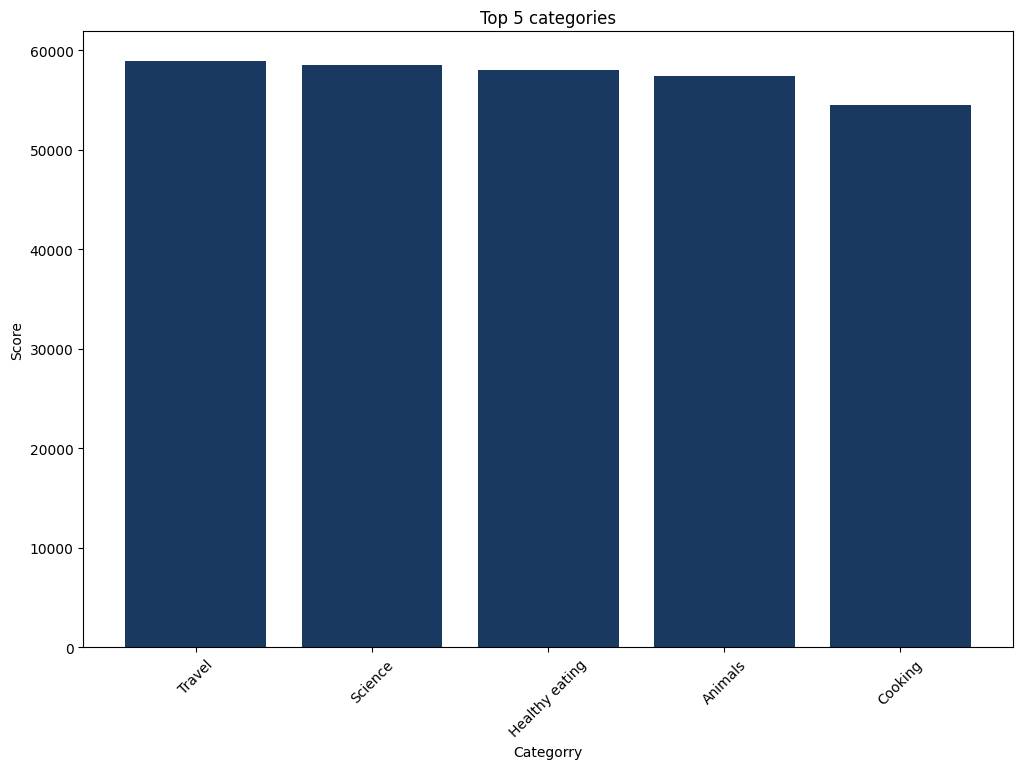

In [69]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(top_five_categories.index, top_five_categories, color = "#1A3960")
ax.set_title('Top 5 categories')
ax.set_xlabel('Categorry')
ax.set_ylabel('Score')
plt.xticks(rotation=45)

plt.savefig('/kaggle/working/top_five_categories.png')

# Hiển thị biểu đồ
plt.show()

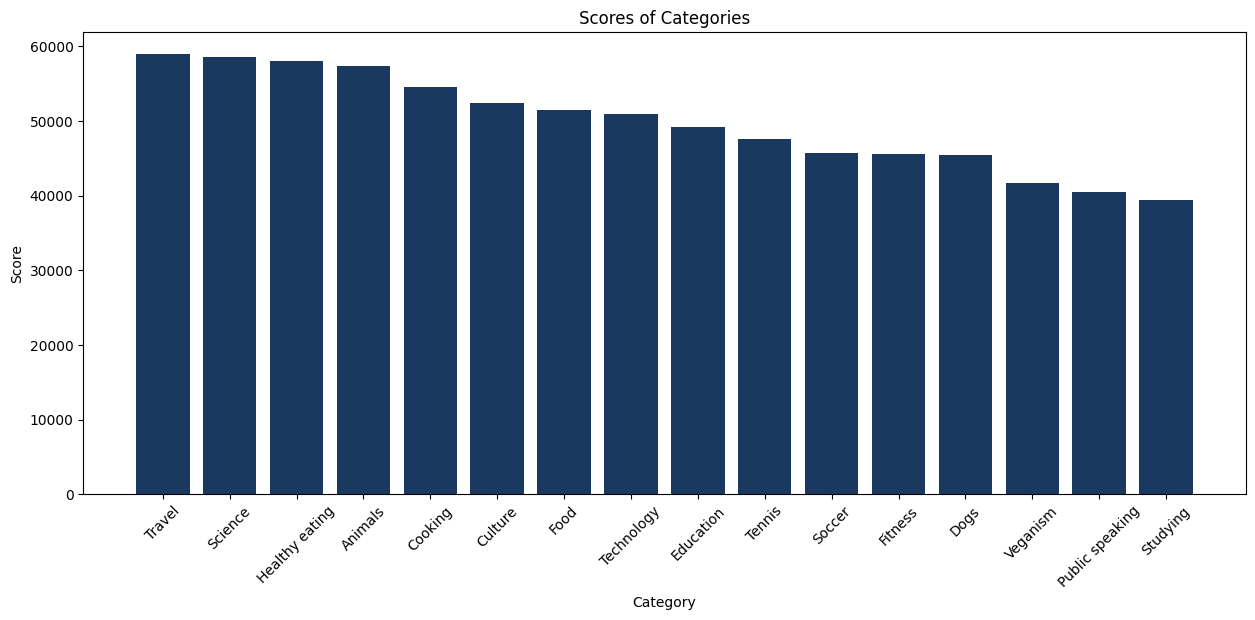

In [51]:
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(category_score_desc.index, category_score_desc, color = "#1A3960")
ax.set_title('Scores of Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Score')
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.show()

**Percentage of Content Type**

In [52]:
content_type_size = merged_df.groupby('Content Type').size()

# Tạo biểu đồ hình tròn 
fig = px.pie(
    names=content_type_size.index, 
    values=content_type_size.values,
    title='Percentage of Content Type', 
    labels={'names': 'Content Type'},
    color_discrete_sequence=px.colors.sequential.Purp
)

fig.update_traces(textinfo='percent+label')

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

**Average Score per Day**

In [53]:
# Chuyển cột Datetime thành một đối tượng datetime
merged_df['Datetime'] = pd.to_datetime(merged_df['Datetime'], format='%Y-%m-%d %H:%M:%S')

# Average score per Hour
average_hourly_scores = merged_df.groupby(merged_df['Datetime'].dt.hour)['Score'].mean()

# Average score
average_score = average_hourly_scores.mean()

# Peak hours
peak_hours = average_hourly_scores[average_hourly_scores > average_score].index
print(peak_hours)

Index([2, 6, 10, 11, 12, 13, 15, 16, 17, 18, 21], dtype='int32', name='Datetime')


In [56]:
hour_labels = [f"{h}:00" for h in range(24)]

# Tạo dấu vết phân tán cho các giờ cao điểm
peak_trace = go.Scatter(
    x=peak_hours,
    y=[average_hourly_scores[hour] for hour in peak_hours],
    mode='markers',
    marker=dict(size=10, color='red'),
    text=[f"Hour: {hour}<br>Average Score: {average_hourly_scores[hour]:.2f}" for hour in peak_hours],
    name='Peak hour'
)

# Tạo đường kẻ cho các các điểm trung bình
line_trace = go.Scatter(
    x=average_hourly_scores.index,
    y=average_hourly_scores,
    mode='lines',
    line=dict(color='blue'),
    name='Average Scores'
)

# Tạo đường gạch ngang cho điểm trung bình
average_trace = go.Scatter(
    x=average_hourly_scores.index,
    y=[average_score] * len(average_hourly_scores),
    mode='lines',
    line=dict(color='green', dash='dash'),
    name='Average Score'
)

# Thiết kế bố cục cho biểu đồ
layout = go.Layout(
    title='Average Score of Hour per Day',
    xaxis=dict(
        title='Hour in Day',
        tickvals=list(range(24)),
        ticktext=hour_labels,
        tickangle=45
    ),
    yaxis=dict(title='Averages scores')
)

# Tạo biểu đồ và thêm các đường kẻ và gạch ngang
fig = go.Figure(data=[peak_trace, line_trace, average_trace], layout=layout)

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Hiển thị biểu đồ
fig.show()

# **Insights**

* Through data exploration, we know that the dataset has a total of 16 different contents. However, out of the 16 contents, the 5 most viewed by users are: Animals, Science, Healthy Eating, Technology, and Food (Animals, Science, Healthy Eating, Technology and Food).
* There are a total of 4 post content types: photo, video, audio, and GIF. All 4 types will generally see roughly equal percentages. However, the image genre accounts for the highest percentage (26.8%)
* Peak engagement hours on the platform are at 3:00 p.m., 5:00 p.m. and 9:00 p.m. Here are three optimal times to post and engage with content
* Thursday, Friday, and Sunday are the days with the highest engagement
* After analyzing the data, May is the month with the highest number of posts

In [65]:
merged_df.to_csv('/kaggle/working/output.csv', index=False)
merged_df

,Content ID,User ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,interested,2020-08-23 12:25:58,positive,30
...,...,...,...,...,...,...,...,...
20051,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,Technology,dislike,2020-06-27 09:46:48,negative,10
20052,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,Technology,intrigued,2021-02-16 17:17:02,positive,45
20053,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,Technology,interested,2020-09-12 03:54:58,positive,30
20054,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,Technology,worried,2020-11-04 20:08:31,negative,12


In [ ]:
fig.savefig('chart.png')